# Classifiying Gender and Income With Census Data

By Saqib Shahzad, Mrinmoy Bhaumik, Phu Truong

In [57]:
# importing the important libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('adults.csv')

data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


We are using the same dataset that we used in Lab 01 and MiniLab. We had done all the preprocessing steps over there but still for the Lab 02 we will do the necessary preprocessing steps withoug going much in details (as we have done this before in the Lab 01 as well).

In [3]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Data Preparation Part 1

We are going to perform two classification tasks and our class variables that we are going to predict are:
##### 1. income (<= 50K or > 50K)
##### 2. sex (Male of Female)

In [5]:
print('Number of "?" appearing in each column:')
print(data[data == '?'].count())

print('\n*******************\n')

data.replace('?', np.nan, inplace=True)

print('Number of "?" appearing in each column after removing them:')
print(data[data == '?'].count())

Number of "?" appearing in each column:
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

*******************

Number of "?" appearing in each column after removing them:
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [6]:
# columns having missing values
print('Number of missing instances in each column.')
print(data.isnull().sum())
        
print('\n****************************\n')

for col in data.columns:
    if data[col].isnull().any():
        data[col] = data[col].fillna(data[col].value_counts().index[0])
        
print('\n****************************\n')

print('Number of missing instances in each column after filling.')
print(data.isnull().sum())

# for col in data.columns:
#         print(col, '        \t', data[col].isnull().sum())

Number of missing instances in each column.
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

****************************


****************************

Number of missing instances in each column after filling.
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [7]:
print('Number of duplicate rows in the dataset: ', data.duplicated().sum())
print('\nShape of data before removing the duplicate rows: ', data.shape)

# dropping duplicates
data = data.drop_duplicates()
print('\nShape of data after removing the duplicate rows: ', data.shape)


print('\nNumber of duplicate rows after removing the duplicates rows: ', data.duplicated().sum())
data[data.duplicated()]

Number of duplicate rows in the dataset:  24

Shape of data before removing the duplicate rows:  (32561, 15)

Shape of data after removing the duplicate rows:  (32537, 15)

Number of duplicate rows after removing the duplicates rows:  0


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income


We remove duplicates to avoid any overfiting of the model while training.

We can now see that there are no more duplicate values.


 Maximum age in the data before removing the outliers 90

99.5 quantile of the age :  78.0

Maximum age in the data after removing the outliers is:  77


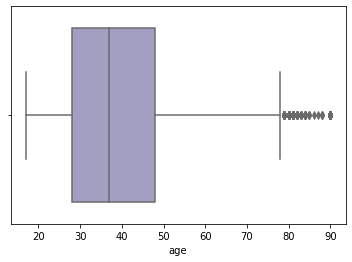

In [8]:
sns.boxplot('age', data=data, palette='Purples')

print('\n Maximum age in the data before removing the outliers', data.age.max())

print('\n99.5 quantile of the age : ', data.age.quantile(0.995))

data = data[data.age < data.age.quantile(0.995)]

print('\nMaximum age in the data after removing the outliers is: ', data.age.max())


We can see that for columns `age` any values after `78` seems to be an outlier and it is intuitive because it is very difficult to earn at this stage of the life. Removing these types of outliers can help us clean the data as well as in making good prediction. The maximum `age` in this data set is now `77`.

Maximun value in educaton num:  16
Minimun value in educaton num:  1


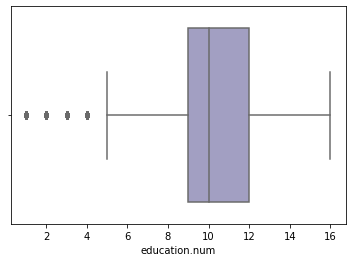

In [9]:
print('Maximun value in educaton num: ', data['education.num'].max())
print('Minimun value in educaton num: ', data['education.num'].min())
sns.boxplot('education.num', data=data, palette='Purples')

Here for the `education_num` column we can see that all those adults which have education lower than 5 is an outlier but that can't be the case everytime because there may be people with no education and may be they earn very well. So we won't remove these.

Maximum value of Hours Per Week column before handling the outliers:  99

Minimum value of Hours Per Week column before handling the outliers:  1


Maximum value of Hours Per Week column after handling the outliers:  59

Minimum value of Hours Per Week column after handling the outliers:  16


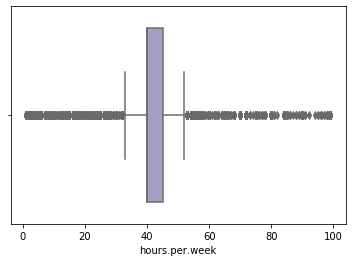

In [10]:
print('Maximum value of Hours Per Week column before handling the outliers: ' ,data['hours.per.week'].max())
print('\nMinimum value of Hours Per Week column before handling the outliers: ' ,data['hours.per.week'].min())

sns.boxplot(data['hours.per.week'], palette='Purples')

hpw_low = data['hours.per.week'].quantile(0.04)
hpw_high = data['hours.per.week'].quantile(0.93)

data = data[(data['hours.per.week'] > hpw_low) & (data['hours.per.week'] < hpw_high)]

print('\n\nMaximum value of Hours Per Week column after handling the outliers: ' ,data['hours.per.week'].max())
print('\nMinimum value of Hours Per Week column after handling the outliers: ' ,data['hours.per.week'].min())

For the `hours.per.week` column, we can see that more 90 percent of the data is treated as outlier and that can't be the case.It is common sense that nobody can work 100 hours per week and is also not common to work for hours betweeen 1 and 10 per week. So for this column we would take values from 15 to 60 hours per week.

As shown in the above cell, the max and the min values now for the `hours.per.week` are `59` and `16` respectively.

In [11]:
data.shape

(28463, 15)

Number of rows has been reduced now due to dropping values from the columns `age` and `hours_per_week` and now at this stage we are having `28463` rows and `15` columns.

In [12]:
correlation = data.corr()

correlation

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.075306,0.031150,0.081406,0.055908,0.117077
fnlwgt,-0.075306,1.000000,-0.048148,-0.005956,-0.010253,-0.014060
education.num,0.031150,-0.048148,1.000000,0.107801,0.074986,0.148723
capital.gain,0.081406,-0.005956,0.107801,1.000000,-0.030466,0.065904
capital.loss,0.055908,-0.010253,0.074986,-0.030466,1.000000,0.051870
hours.per.week,0.117077,-0.014060,0.148723,0.065904,0.051870,1.000000


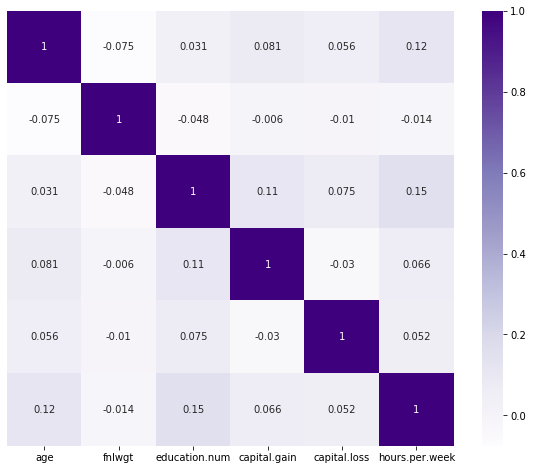

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, yticklabels=False, cmap='Purples')

This heatmap shows there is little to none correlation between attributes due to majority of the boxes are are showing correlation of around 0.5 which is normal. Since `fnlwgt` has no correlation with any other features (it's neither positively correlated nor negatively), so it's better to drop them from the dataset.

In [14]:
data = data.drop('fnlwgt', axis=1)

data.shape

(28463, 14)

We have two different columns with same kind of information, `education.num` and `education`. `education` has the values of the education of the adults in string form while `education_num` have those values in integer form. So it is better to have only one of them and drop the other one because both are telling us the same information. We are going to drop `education` because the `education_num` is already in integer form so we won't need to convert it to numerical column as it is already there.

In [15]:
data.drop('education', axis=1, inplace=True)
data.columns

Index(['age', 'workclass', 'education.num', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'native.country', 'income'],
      dtype='object')

In [16]:
print('Number of individuals that are not from US: ',data[data['native.country']!='United-States'].shape[0])

print('\nNumber of individuals that are from US: ', data[data['native.country']== 'United-States'].shape[0])

Number of individuals that are not from US:  2489

Number of individuals that are from US:  25974


Out of `28463` individuals, `25974` of them are from `United-States` and only `2489` are from `40` other different countries. The sum of all the individuals that are not in `United-States` is `2489` which is very much of a low value as compared to `25974` which are from US. That is why we combined all those who aren't from US to compare it with those who are from US. If we didn't do this then after one hot encoding we will get so many columns from only one column, that is why it is better to combine all other countries and rename it as `Others`.

In [17]:
data['native.country'] = data['native.country'].replace(['Mexico', 'Greece', 'Vietnam', 'China',
       'Philippines', 'Trinadad&Tobago', 'Canada', 'South',
       'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran', 'England',
       'Germany', 'Japan', 'Hong', 'Taiwan', 'India', 'Ireland',
       'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic', 'Haiti',
       'El-Salvador', 'Columbia', 'Guatemala', 'Cuba', 'Jamaica', 'Italy',
       'France', 'Yugoslavia', 'Scotland', 'Portugal', 'Ecuador', 'Laos',
       'Hungary', 'Honduras', 'Outlying-US(Guam-USVI-etc)', 'Thailand'], 'Others')

data['native.country'].value_counts()

United-States    25974
Others            2489
Name: native.country, dtype: int64

In [18]:
data.income   =   data.income.replace({'<=50K': 0, '>50K': 1})
data.sex  =   data.sex.replace({'Female': 0, 'Male': 1})

Replacing both the `income` and `sex` columns with `0s` and `1s`. For the `income` column `0` means `<=50K` and `1` means `>50K` while for the `sex` column `0` is for `female` and `1` is for `male` as both of these will be our final predicting variables for our classification tasks and it is necessary for both of them to be in numerical attribute.

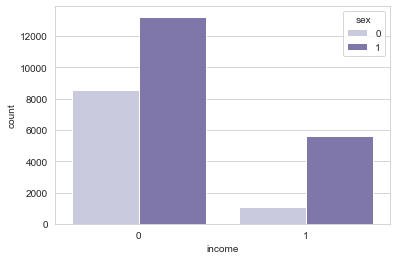

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='income',
    hue='sex',
    data=data,
    palette='Purples')

The above bar chart shows us the distinctions in male and female salary dependent on sexual orientation. We see includes are a lot higher in guys. In the >50k pay, guys indicated a much higher contrast between their female partners, proposing that guys rule that pay gap more so than those in the <=50 salary.

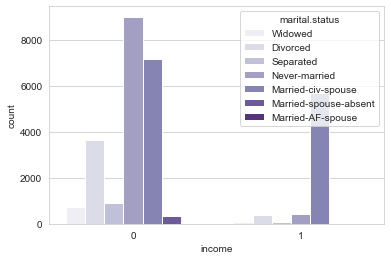

In [20]:
sns.countplot(x='income',
    hue='marital.status',
    data=data,
    palette='Purples')

The above bar chart outline speaks to salary of pay by conjugal status. Fascinating to see a couple of things, leading the <=50k salary of pay most elevated checks originate from the "Never-married" status. This recommends marriage does in reality accompany alot of monetary advantage, as should be obvious is important on the other portion of the outline. As married couples far outclass some other classification includes in the >50k salary of pay. We can affirm this again as the greater part of the divorced, separated , or widowed are situated in the lower pay gap. Recommending that, on the off chance that you need to make over 50k, you should get yourself an accomplice and keep them! For our next graph, Lets split up the age bunches in receptacles of 10 years, and see what sort of salary contrasts we see.

In [21]:
categorical_features = data.select_dtypes(include='object')
numerical_features = data.select_dtypes(exclude='object')

Splitting the `data` into `categorical_features` and `numerical_features`. The `categorical_features` of the data will be converted to dummy variables because all Machine Learning algorithms need numeric data for training as well as testing.

In [22]:
categorical_features.columns

Index(['workclass', 'marital.status', 'occupation', 'relationship', 'race',
       'native.country'],
      dtype='object')

In [23]:
numerical_features.columns

Index(['age', 'education.num', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'income'],
      dtype='object')

In [24]:
one_hot_encoded = pd.get_dummies(categorical_features, prefix_sep=':', drop_first=True)
one_hot_encoded.head()

,workclass:Local-gov,workclass:Never-worked,workclass:Private,workclass:Self-emp-inc,workclass:Self-emp-not-inc,workclass:State-gov,workclass:Without-pay,marital.status:Married-AF-spouse,marital.status:Married-civ-spouse,marital.status:Married-spouse-absent,...,relationship:Not-in-family,relationship:Other-relative,relationship:Own-child,relationship:Unmarried,relationship:Wife,race:Asian-Pac-Islander,race:Black,race:Other,race:White,native.country:United-States
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1


Converting all the `categorical_features` into dummy variables and dropping the first dummy variable in order convert categorical variables into a form that could be provided to ML algorithms to do a better job in prediction.

In [25]:
#Here is the list of one-hot encoded attributes for clarification

one_hot_encoded.columns

Index(['workclass:Local-gov', 'workclass:Never-worked', 'workclass:Private',
       'workclass:Self-emp-inc', 'workclass:Self-emp-not-inc',
       'workclass:State-gov', 'workclass:Without-pay',
       'marital.status:Married-AF-spouse', 'marital.status:Married-civ-spouse',
       'marital.status:Married-spouse-absent', 'marital.status:Never-married',
       'marital.status:Separated', 'marital.status:Widowed',
       'occupation:Armed-Forces', 'occupation:Craft-repair',
       'occupation:Exec-managerial', 'occupation:Farming-fishing',
       'occupation:Handlers-cleaners', 'occupation:Machine-op-inspct',
       'occupation:Other-service', 'occupation:Priv-house-serv',
       'occupation:Prof-specialty', 'occupation:Protective-serv',
       'occupation:Sales', 'occupation:Tech-support',
       'occupation:Transport-moving', 'relationship:Not-in-family',
       'relationship:Other-relative', 'relationship:Own-child',
       'relationship:Unmarried', 'relationship:Wife',
       'race:As

In [26]:
income_data = pd.concat([numerical_features, one_hot_encoded], axis=1)
sex_data    = pd.concat([numerical_features, one_hot_encoded], axis=1)

income  =   income_data['income']
sex     =   sex_data['sex']

We are creating two different datasets, `income_data` and `sex_data`, in order to train the model on them for both the purposes (predicting the `income` and the `sex`). 

We are also making separate serieses of both the `income` and `sex` columns. These serieses (`income` and `sex`) will then be used as the Target Variables. For predicting the income of an individual, `income` series will be used as Target Variable for predicting the `income` and same for the other series i.e `sex` will be used as the Target Variable fro predicting the `sex` of an individual.

In [27]:
len(income_data.columns) == len(sex_data.columns)

True

## Data Preparation Part 2

In [28]:
full_data_income = income_data
full_data_sex = sex_data

`full_data_income` and `full_data_sex` are the two final datasets that we will be using for predicting the `income` and the `sex` of an individual respectively.

In [29]:
full_data_income = full_data_income.reset_index(drop=True)

full_data_income.head(10)

,age,education.num,sex,capital.gain,capital.loss,hours.per.week,income,workclass:Local-gov,workclass:Never-worked,workclass:Private,...,relationship:Not-in-family,relationship:Other-relative,relationship:Own-child,relationship:Unmarried,relationship:Wife,race:Asian-Pac-Islander,race:Black,race:Other,race:White,native.country:United-States
0,66,10,0,0,4356,40,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
1,54,4,0,0,3900,40,0,0,0,1,...,0,0,0,1,0,0,0,0,1,1
2,41,10,0,0,3900,40,0,0,0,1,...,0,0,1,0,0,0,0,0,1,1
3,34,9,0,0,3770,45,0,0,0,1,...,0,0,0,1,0,0,0,0,1,1
4,38,6,1,0,3770,40,0,0,0,1,...,0,0,0,1,0,0,0,0,1,1
5,74,16,0,0,3683,20,1,0,0,0,...,0,1,0,0,0,0,0,0,1,1
6,68,9,0,0,3683,40,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
7,45,16,0,0,3004,35,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1
8,38,15,1,0,2824,45,1,0,0,0,...,1,0,0,0,0,0,0,0,1,1
9,52,13,0,0,2824,20,1,0,0,1,...,1,0,0,0,0,0,0,0,1,1


In [30]:
full_data_sex = full_data_sex.reset_index(drop=True)

full_data_sex.head(10)

,age,education.num,sex,capital.gain,capital.loss,hours.per.week,income,workclass:Local-gov,workclass:Never-worked,workclass:Private,...,relationship:Not-in-family,relationship:Other-relative,relationship:Own-child,relationship:Unmarried,relationship:Wife,race:Asian-Pac-Islander,race:Black,race:Other,race:White,native.country:United-States
0,66,10,0,0,4356,40,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
1,54,4,0,0,3900,40,0,0,0,1,...,0,0,0,1,0,0,0,0,1,1
2,41,10,0,0,3900,40,0,0,0,1,...,0,0,1,0,0,0,0,0,1,1
3,34,9,0,0,3770,45,0,0,0,1,...,0,0,0,1,0,0,0,0,1,1
4,38,6,1,0,3770,40,0,0,0,1,...,0,0,0,1,0,0,0,0,1,1
5,74,16,0,0,3683,20,1,0,0,0,...,0,1,0,0,0,0,0,0,1,1
6,68,9,0,0,3683,40,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
7,45,16,0,0,3004,35,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1
8,38,15,1,0,2824,45,1,0,0,0,...,1,0,0,0,0,0,0,0,1,1
9,52,13,0,0,2824,20,1,0,0,1,...,1,0,0,0,0,0,0,0,1,1


In [31]:
full_data_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28463 entries, 0 to 28462
Data columns (total 43 columns):
age                                     28463 non-null int64
education.num                           28463 non-null int64
sex                                     28463 non-null int64
capital.gain                            28463 non-null int64
capital.loss                            28463 non-null int64
hours.per.week                          28463 non-null int64
income                                  28463 non-null int64
workclass:Local-gov                     28463 non-null uint8
workclass:Never-worked                  28463 non-null uint8
workclass:Private                       28463 non-null uint8
workclass:Self-emp-inc                  28463 non-null uint8
workclass:Self-emp-not-inc              28463 non-null uint8
workclass:State-gov                     28463 non-null uint8
workclass:Without-pay                   28463 non-null uint8
marital.status:Married-AF-spouse     

###### This is the final dataset that will be used for predicting the `income` of an individual.

In [32]:
full_data_sex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28463 entries, 0 to 28462
Data columns (total 43 columns):
age                                     28463 non-null int64
education.num                           28463 non-null int64
sex                                     28463 non-null int64
capital.gain                            28463 non-null int64
capital.loss                            28463 non-null int64
hours.per.week                          28463 non-null int64
income                                  28463 non-null int64
workclass:Local-gov                     28463 non-null uint8
workclass:Never-worked                  28463 non-null uint8
workclass:Private                       28463 non-null uint8
workclass:Self-emp-inc                  28463 non-null uint8
workclass:Self-emp-not-inc              28463 non-null uint8
workclass:State-gov                     28463 non-null uint8
workclass:Without-pay                   28463 non-null uint8
marital.status:Married-AF-spouse     

###### This is the final dataset that will be used for predicting the `gender (Male or Female)` of an individual.

For both of our datasets (`income` and `sex`) we have `44` columns and `28463` rows. 

Splitting datasets into their respective training and testing label attributes for feeding it to the model.

In [33]:
income_data = full_data_income.drop(columns=['income'])
income_labels = full_data_income['income']

sex_data = full_data_sex.drop(columns=['sex'])
sex_labels = full_data_sex['sex']

We are dropping the `income` column from `full_data_income` and `sex` column from `full_data_sex` as these two are our Target Variables. The `income_data` will be having the `sex` column and `sex_data` will be having the `income` column because we don't want to lose the information. The other reason of keeping the `sex` column in `income_data` is that it can be an important feature for predicting the income of an individual and also `income` can be an important feature for predicting the `sex` of an individual.

These are the final datasets that we will be using.

## Modeling and Evaluation 1

#### Evaluation Metrics

We are going to perform two different classification tasks, since both are classification tasks, the evaluation metricsthat  we will be using are as follows: <br>
- Accuracy
- Precision
- Recall
- F-1 Score

#### Accuracy
As this is the classification task, so we want to check the accuracy of our model as how often it predicts accurately the given output label. Having high accuracy means our model is generally performing good. Accuracy is the total of `True Positives` + `True Negatives` and divided by `Total Number of input samples` <br>

#### Precision / Recall
Next we are checking the `precision` of our model. We want to see if it classifies based on the attributes, how often is it correct.
In `Recall` we want to see if it classifies accurately, how often does it classifies accurately.
In our task, we want high precision i.e to accurately predict the output label instead of high recall which even allows some false predictoins to fall in predictions test.
We can’t have it both ways, i.e high precision and recall a phenomenan known as `precision/recall tradeoff`. If we increase `precision`, `recall` would fall down. So for easy evaluation and balanced mean between both `precision and recall`, we use `F-1 Score`.

#### F-1 Score
It is often good to combine `Precision` and `Recall` into a single metric `F-1 Score`. As both `False Negatives` and `False Positives` play equall role in our classification tasks in terms of cost. So we want to evaluate based on F-1 score to see how Precission and Recall tradeoff plays in our classification task by telling us how precise our model is and tries to find the balance between precision and recall. So, by checking the `F-1 score` we can see how much better our model is performing.

#### Confusion Matrix
Confusion matrix is another very good metric for classification algorithms. A confusion matrix has the capability to tell the mistakes done by the classifiers as well. For binary classification, the confusion matrix will be a `2x2` matrix and the values on the diagonal will be the values that are correctly classified and the values off the diagonal are the misclassified points. By looking at a confusion matrix, one can also get a hint whether his/her model is overfitting or underfitting.

We have created our own functions for all these metrices that we are using because we will be calculating these metrices many times so it is better to create some functions only once and then call those functions whenever needed.

In [34]:
def plot_confusion_matrix(y_true, y_pred, 
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Purples):
    
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    
    cm = confusion_matrix(y_true, y_pred)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap = cmap)
    ax.figure.colorbar(im, ax=ax)
    
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [35]:
def acc_res(y_test, y_pred):
    
    print("Confusion Matrix")
    matrix = confusion_matrix(y_test,y_pred)
    print(matrix)
    print("---------------------------------------")
    accuracy_scr = accuracy_score(y_test, y_pred)
    recall_scr = recall_score(y_test, y_pred)
    precision_scr = precision_score(y_test, y_pred)
    print(f"Accuracy Score: {accuracy_scr*100:.4f}%")
    print(f"Recall Score: {recall_scr*100:.4f}%")
    print(f"Precision Score: {precision_scr*100:.4f}%")
    print("-----------------------------------------")
    print("Classification Report")
    print(classification_report(y_test,y_pred))
    print(plot_confusion_matrix(y_test, y_pred))

## Modeling and Evaluation 2

We are using built-in `train_test_split` package from scikit-learn for randomly splitting our data into traing and testing splits. We will be doing this for both `income_data` as well as `sex_data` separately. We are diving the our data into 80% training data and 20% testing data. The `random_state` parameter in train_test_split will give us randomly splitted data and the `42` will give us exactly the same distribution of our data each time we run this. this random_state parameter shuffle the data in a way that we will get the same shuffle each time we run this. 

We have added `stratify` parameter equals to the `labels` in `train_test_split` for the purpose of stratification. Due to this `stratify` parameter both our training and testing splits will be having the labels from both the calsses which is very essential for every algorithm. This stratification also helps us preventing from the overfitting and underfitting.

In [36]:
X_train_income, X_test_income, y_train_income, y_test_income = train_test_split(income_data, income_labels, test_size =0.2, random_state = 42, stratify = income_labels)

We have splitted our `income` data into `X_train_income`, `X_test_income`, `y_train_income`, and `y_test_income`. `X_train_income` and `y_train_income` will be used to train the model and `X_test_income` will be used to test the model and to make predictions on while `y_test_income` will be used to evaluate our model(s).

After splitting the data into training and testing now we are giong to Scale are data using `StandardScaler` for income task. 
<br>

We do this because variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. So, to deal with this potential problem feature-wise standardizedization is used before model fitting.
We have used `StandardScaler` instead of `MinMaxScaler` because `StandardScaler` uses the mean and standard deviation to calculate the scaled values meanwhile `MinMaxScaler` just rescales the variables in the range 0-1 which is not appropriate to use here as our data relies in number of variables.

We are only fitting our scaler object on Training data because we dont want to bias our model with the information from the testing data. If we fit our test data and transform it on it, we would calculate new mean and standard deviation for each feature which might causes problems while testing our model as both the scaled models are using different mean and standard deviations.

In [37]:
scaler_income = StandardScaler()

In [38]:
scaler_income.fit(X_train_income)
X_train_scaled_income = scaler_income.transform(X_train_income)
X_test_scaled_income = scaler_income.transform(X_test_income)

So, our final data to be used for predicting the `income` is now `X_train_scaled_income`, `X_test_scaled_income`, `y_train_income`, and `y_test_income`

In [39]:
X_train_gender, X_test_gender, y_train_gender, y_test_gender = train_test_split(sex_data, sex_labels, test_size =0.2,
                                                                                random_state = 42, stratify = sex_labels)

Now we have splitted our `sex_data` data into `X_train_gender`, `X_test_gender`, `y_train_gender`, and `y_test_gender`. `X_train_gender` and `y_train_gender` will be used to train the model and `X_test_gender` will be used to test the model and to make predictions on while `y_test_gender` will be used to evaluate our model(s).

We will do the exact same scalling for the `sex_data` that we did for `income_data`.

So after scaling, our final data to be used for task 2 (predicting the `gender`) will be `X_train_scaled_gender`, `X_test_scaled_gender`, `y_train_gender`, and `y_test_gender`

In [40]:
scaler_gender = StandardScaler()

In [41]:
scaler_gender.fit(X_train_gender)
X_train_scaled_gender = scaler_income.transform(X_train_gender)
X_test_scaled_gender = scaler_income.transform(X_test_gender)

## Modeling and Evaluation 3

We will be using three different classfiers for predicting the `income` as well as three classifiers for predicting the `gender`. 

<br>

The Classifiers that we will be using for predicting the `income` are: <br>
1. Support Vector Classifier
2. K-Nearest Neighbours
3. Random Forest Classifier
4. Gradient Boosting Classifier

While the classifiers that we will be using for predicting the `gender` are: <br>
1. Random Forest Classifier
2. Logistic Regression
3. K-Nearest Neighbours
4. Gradient Boosting Classifier

#### Why Support Vector Classifier?

The support vector machine is a classifier that speaks to the training information as points in space isolated into classifications by a hole as wide as could be expected under the circumstances. New points are then added to space by foreseeing which class they fall into and which space they will have a place with. 
It utilizes a subset of training data in the choice capacity which makes it memory proficient and is exceptionally powerful in high dimensional spaces. The main disadvantage with the support vector machine is that the algorithm doesn't straightforwardly give likelihood estimates.


#### Why K-Nearest Neighbours?

It is a lazy learning algorithm that stores all instances relating to training information in n-dimensional space. It is a languid learning calculation as it doesn't zero in on building an overall inner model, rather, it deals with putting away cases of training data. 
This algorithm is a very straightforward in its execution and is hearty to uproarious training information. Regardless of whether the training information is huge, it is very effective. The main inconvenience with the KNN calculation is that there is no compelling reason to decide the estimation of K and computation cost is pretty high contrasted with different other algorithms.


#### Why Random Forest Classifier?

Random decision trees or random forest are an ensemble learning method for classification, regression, etc. It operates by constructing a multitude of decision trees at training time and outputs the class that is the mode of the classes or classification or mean prediction(regression) of the individual trees.
The advantage of the random forest is that it is more accurate than the decision trees due to the reduction in the over-fitting. The only disadvantage with the random forest classifiers is that it is quite complex in implementation and gets pretty slow in real-time prediction.

Random decision trees or random forest are an ensemble learning strategy for classification, grouping, and so forth It works by developing a huge number of decision trees at training time and yields the class that is the method of the classes or classification or mean prediction(regression) of the individual trees. 
The benefit of the random forest is that it is more precise than the decision trees because of the decrease in the over-fitting. The main drawback with the random forest classifiers is that it is very perplexing in execution and gets pretty delayed in realtime prediction.

#### Why Gradient Boosting Classifier?
Gradient Boosting is like a Random Forest as in that it uses a set of decision trees for either regression or classification.  The main differences are that in a Random Forest the trees are built independently while in Gradient Boosting they are built one after the other in an additive sequence where each new tree is built to improve on the previous tree.  Also the other difference is that the results of the model are calculated at the end for Random Forest by averaging all the trees out but for Gradient Boosting it calculates the result along the way.  Gradient boosting has the potential to work better than a random forest if the parameters tuned but may perform poorly if there is a lot statistical noise.  Since our data isn't very noisy and we removed a lot of outliers it could be possible that this works better than the Random Forest so it would be interesting to see if that would be the case.[2]  

#### Why Logistic Regression?

Logistics regression is a classification algorithms which performs really well on binary data, and since both our class variables are binary, that is why we are going to perform Logistic regression. Logistic Regression algorithm is used to predict a binary outcome based on a set of independent variables. Logistic regression is used to calculate the probability of a binary event occurring, and to deal with issues of classification. For example, in our case predicting if an individual is earning `more than 50K (>50K)` or `less than 50K (<=50K)`, or predicting if the individual is `male` or `female`. Logistic regression is used to predict the likelihood of all kinds of `>50K` or `<=50K`, in our case, outcomes. By predicting such outcomes, logistic regression helps in making informed decisions. 

Instantiating classifiers in the below cell. (Parameters chosen referred to 'Exceptional Work' section)

In [58]:
clf_svc = SVC(degree = 5, tol = 0.0001)
clf_knn =  KNeighborsClassifier(n_neighbors = 8, leaf_size = 40)
clf_rforest = RandomForestClassifier(n_estimators = 350, max_depth = 10, min_samples_split = 4)
clf_logreg = LogisticRegression (penalty='l2', tol=0.0001, C=1.0, fit_intercept=True,)
clf_GB = GradientBoostingClassifier(n_estimators=350)

In [59]:
classifiers_income = ['Support Vector Classifier', 'K-Nearest Neighbours', 'Random Forest Classifier', 'Gradient Boosting Classifier']

classifiers_gender = ['Logistic Regression', 'K-Nearest Neighbours', 'Random Forest Classifier', 'Gradient Boosting Classifier']

models_income = {clf_svc:'Support Vector Classifier',
          clf_knn:'K-Nearest Neighbours',
          clf_rforest: 'Random Forest Classifier',
          clf_GB: 'Gradient Boosting Classifer'}

models_gender = {clf_logreg:'Logistic Regression',
          clf_knn:'K-Nearest Neighbours',
          clf_rforest: 'Random Forest Classifier',
          clf_GB: 'Gradient Boosting Classifer'}

Creating a functions for easy confusion matrix plotting, training, and accuracy measures as we dont have to do the same steps again and again for every model.

In [60]:
def train(algo, name, X_train, y_train, X_test, y_test):
    algo.fit(X_train, y_train)
    y_pred       = algo.predict(X_test)
    acc_sc       = accuracy_score(y_test,y_pred)
    precision_sc = precision_score(y_test, y_pred)
    recall_sc    = recall_score(y_test, y_pred)
    f1_sc        = f1_score(y_test, y_pred)
    
    print(f"--------------------------------------------{name}---------------------------------------------------")
    print(f"Accuracy Score for {name}: {acc_sc*100:.4f}%")
    return y_test,y_pred,acc_sc, precision_sc, recall_sc, f1_sc


## Modeling and Evaluation Part 4

### Task 1: Predicting the Income(>50K/<=50K)

`main_income` function for computing all the training and testing of the models with their evaluation metrics being displayes as well.

--------------------------------------------Support Vector Classifier---------------------------------------------------
Accuracy Score for Support Vector Classifier: 85.2275%
Confusion Matrix
[[4094  265]
 [ 576  758]]
---------------------------------------
Accuracy Score: 85.2275%
Recall Score: 56.8216%
Precision Score: 74.0958%
-----------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4359
           1       0.74      0.57      0.64      1334

   micro avg       0.85      0.85      0.85      5693
   macro avg       0.81      0.75      0.78      5693
weighted avg       0.84      0.85      0.85      5693

Normalized confusion matrix
[[0.93920624 0.06079376]
 [0.43178411 0.56821589]]
AxesSubplot(0.0843171,0.0375;0.712546x0.925)
--------------------------------------------K-Nearest Neighbours---------------------------------------------------
Accuracy Score for K-Nearest Neighb

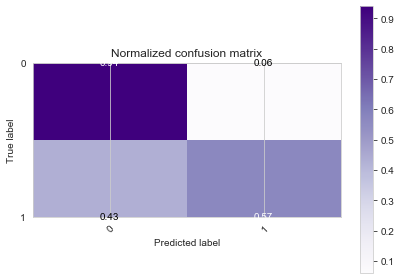

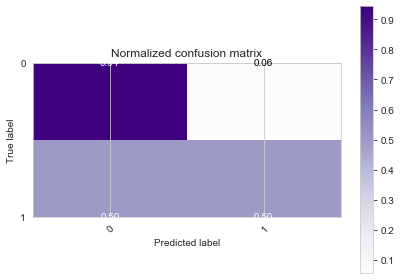

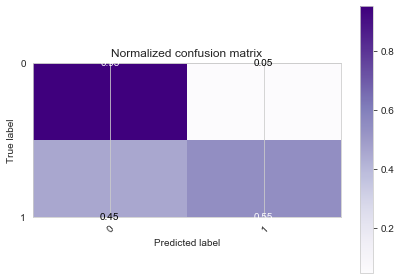

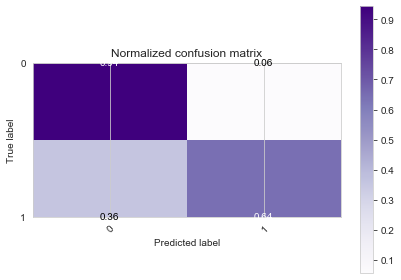

In [61]:
def main_income(models_income):
    accuracy_scores_income = []
    precision_scores_income = []
    recall_scores_income = []
    f1_scores_income = []
    for algo, name in models_income.items():
        y_test_train, y_pred, acc_sc, precision_sc, recall_sc, f1_sc = train(algo, name, X_train_scaled_income,
                                                                             y_train_income,X_test_scaled_income, 
                                                                             y_test_income)
        acc_res(y_test_train,y_pred)
        accuracy_scores_income.append(acc_sc)
        precision_scores_income.append(precision_sc)
        recall_scores_income.append(recall_sc)
        f1_scores_income.append(f1_sc)
    return accuracy_scores_income, precision_scores_income, recall_scores_income, f1_scores_income
    
accuracy_scores_income, precision_scores_income, recall_scores_income, f1_scores_income = main_income(models_income)

In [62]:
pd.DataFrame(list(zip(accuracy_scores_income, precision_scores_income, recall_scores_income, f1_scores_income)),
              columns = ['Accuracy Scores', 'Precision', 'Recall', 'F1 Score'],
              index = classifiers_income).sort_values(by = 'Accuracy Scores', ascending = False)

,Accuracy Scores,Precision,Recall,F1 Score
Gradient Boosting Classifier,0.872651,0.775566,0.642429,0.702747
Random Forest Classifier,0.856139,0.773645,0.545727,0.640000
Support Vector Classifier,0.852275,0.740958,0.568216,0.643190
K-Nearest Neighbours,0.839101,0.728166,0.500000,0.592889


### Evaluation


`Accuracy` being our most important metric, we can see that `Gradient Boosting Classifier` has scored more in terms of the accuracy. Meanwhile, we still have have to consider other metrics as well.  When we look at the other metrics, it seems to be better than all the other models across the board. `Random Forest Classifier` came in second in terms of accuracy and precision but the `Support Vector Classifier` had better recall and therefore a better F1 score than the Random Forest.  `K-Nearest Neighbours` seemed to perform the worst across the board compared to the other models. 

So, for further analysis in `Exceptional Work`, we'll use `Gradient Boosting Classifier` as it is being the most adaptable classifier in our case

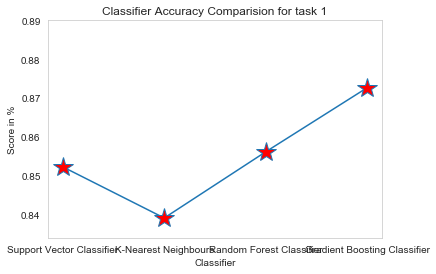

In [67]:
plt.plot(classifiers_income, accuracy_scores_income, marker='*', ms=20, markerfacecolor='r')
plt.grid()
plt.title('Classifier Accuracy Comparision for task 1')
plt.xlabel('Classifier')
plt.ylabel('Score in %')
plt.ylim(0.834, 0.89)
plt.show()

From above graph, we can see `Random Forest` scored more on `Accuracy` scale.

#### Task 2: Predicting the Gender (Male/Female)

`Main_gender` function for computing all the training and testing of the models with their evaluation metrics being displayes as well.

--------------------------------------------Logistic Regression---------------------------------------------------
Accuracy Score for Logistic Regression: 83.4182%
Confusion Matrix
[[1509  417]
 [ 527 3240]]
---------------------------------------
Accuracy Score: 83.4182%
Recall Score: 86.0101%
Precision Score: 88.5972%
-----------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.74      0.78      0.76      1926
           1       0.89      0.86      0.87      3767

   micro avg       0.83      0.83      0.83      5693
   macro avg       0.81      0.82      0.82      5693
weighted avg       0.84      0.83      0.84      5693

Normalized confusion matrix
[[0.7834891  0.2165109 ]
 [0.13989912 0.86010088]]
AxesSubplot(0.0843171,0.0375;0.712546x0.925)
--------------------------------------------K-Nearest Neighbours---------------------------------------------------
Accuracy Score for K-Nearest Neighbours: 82.364

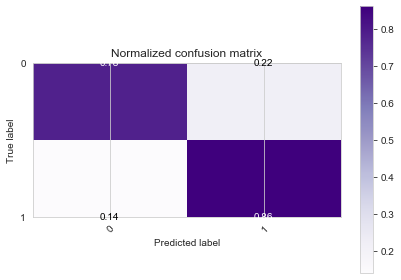

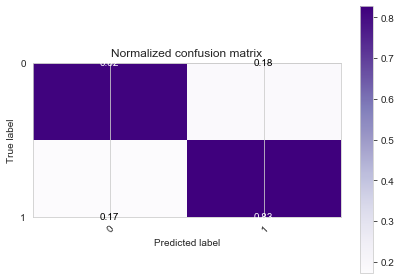

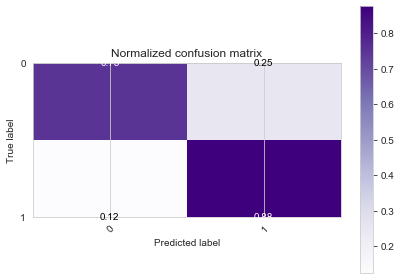

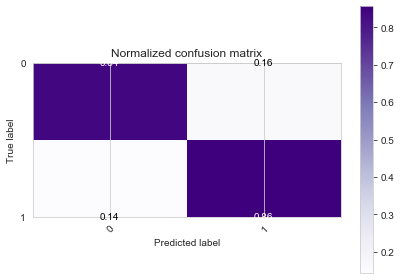

In [68]:
def main_gender(models_gender):
    accuracy_scores_gender = []
    precision_scores_gender = []
    recall_scores_gender = []
    f1_scores_gender = []
    for algo, name in models_gender.items():
        y_test_train, y_pred, acc_sc, precision_sc, recall_sc, f1_sc = train(algo, name,X_train_scaled_gender,
                                                                             y_train_gender,X_test_scaled_gender,
                                                                             y_test_gender)
        acc_res(y_test_train,y_pred)
        accuracy_scores_gender.append(acc_sc)
        precision_scores_gender.append(precision_sc)
        recall_scores_gender.append(recall_sc)
        f1_scores_gender.append(f1_sc)
    return accuracy_scores_gender, precision_scores_gender, recall_scores_gender, f1_scores_gender
    
accuracy_scores_gender, precision_scores_gender, recall_scores_gender, f1_scores_gender = main_gender(models_gender)

In [69]:
pd.DataFrame(list(zip(accuracy_scores_gender, precision_scores_gender, recall_scores_gender, f1_scores_gender)),
              columns = ['Accuracy Scores', 'Precision', 'Recall', 'F1 Score'],
             index = classifiers_gender).sort_values(by = 'Accuracy Scores', ascending = False)

,Accuracy Scores,Precision,Recall,F1 Score
Gradient Boosting Classifier,0.850167,0.912281,0.855853,0.883167
Logistic Regression,0.834182,0.885972,0.860101,0.872845
Random Forest Classifier,0.833128,0.872915,0.875232,0.874072
K-Nearest Neighbours,0.823643,0.898701,0.826653,0.861173


### Evaluation


`Accuracy` being our most important metric, we can see that `Gradient Boosting Classifier` has scored more in terms of the accuracy. Meanwhile, we still have have to consider other metrics as well.  When we look at the other metrics, it seems to be better than all the other models across the board. `Logistic Regression` came in second in terms of accuracy but the `Random Forest Classifier` had better recall and therefore a better F1 score.  `K-Nearest Neighbours` seemed to perform the worst in terms of accuracy, recall, and also the F-1 score but it seems to be the second most precise model out of all of them. 

So, for further analysis in `Exceptional Work`, we'll use `Gradient Boosting Classifier` as it is being the most adaptable classifier in our case

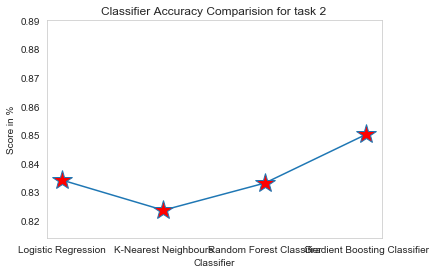

In [70]:
plt.plot(classifiers_gender, accuracy_scores_gender, marker='*', ms=20, markerfacecolor='r')
plt.grid()
plt.title('Classifier Accuracy Comparision for task 2')
plt.xlabel('Classifier')
plt.ylabel('Score in %')
plt.ylim(0.814, 0.89)
plt.show()

## Modeling and Evaluation 5

Although all the algorithms performed well on the data for both the classification tasks, the `Gradient Boosting Classifier` was the best of them and the reason behind this is that it is an ensemble tree method.  Usually a model like a Random Forest would work better than other models since the data has a mix of numerical and categorical variables.[1]  The reason Gradient Boosting works better than the Random Forest in this case is because the data itself isn't very noisy as in the data does not contain too many outliers or observations that don't make sense.  It might be better in some instances to use Random Forest instead of Gradient Boosting though since Random Forest takes almost half the time to run.

Assuming that all the observations within our data are independent, we are going to run a 5x2 paired t-test, where alpha = .05, to determine whether there is a statistically signficant difference between the different models we ran for both the income classification task and the gender classification task.  The following t-tests are for the income classification task:

In [71]:
from mlxtend.evaluate import paired_ttest_5x2cv

# Gradient Boosting vs Random Forest

t, p = paired_ttest_5x2cv(estimator1=clf_GB,
                          estimator2=clf_rforest,
                          X=income_data, y=income_labels,
                          random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: 11.606
p value: 0.000


In [72]:
# Gradient Boosting vs K-NN

t, p = paired_ttest_5x2cv(estimator1=clf_GB,
                          estimator2=clf_knn,
                          X=income_data, y=income_labels,
                          random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: 7.229
p value: 0.001


In [73]:
# Gradient Boosting vs Support Vector

t, p = paired_ttest_5x2cv(estimator1=clf_GB,
                          estimator2=clf_svc,
                          X=income_data, y=income_labels,
                          random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: 8.530
p value: 0.000


In [74]:
# Random Forest vs K-NN

t, p = paired_ttest_5x2cv(estimator1=clf_rforest,
                          estimator2=clf_knn,
                          X=income_data, y=income_labels,
                          random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: 3.202
p value: 0.024


In [75]:
# Random Forest vs Support Vector

t, p = paired_ttest_5x2cv(estimator1=clf_rforest,
                          estimator2=clf_svc,
                          X=income_data, y=income_labels,
                          random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: -0.113
p value: 0.914


In [76]:
# K-NN vs Support Vector

t, p = paired_ttest_5x2cv(estimator1=clf_knn,
                          estimator2=clf_svc,
                          X=income_data, y=income_labels,
                          random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: -3.498
p value: 0.017


As you can see from above, when comparing the models, there is statistically significant difference between almost all of them since the p-value is less than .05.  The only models that are not different in statistically significant way are the Random Forrest Classifier model and the Support Vector Machine Classifier model.  The following are the paired t-tests of the gender classification task:

In [77]:
# Gradient Boosting vs Random Forest
t, p = paired_ttest_5x2cv(estimator1=clf_GB,
                          estimator2=clf_rforest,
                          X=sex_data, y=sex_labels,
                          random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: 3.641
p value: 0.015


In [78]:
# Gradient Boosting vs K-NN
t, p = paired_ttest_5x2cv(estimator1=clf_GB,
                          estimator2=clf_knn,
                          X=sex_data, y=sex_labels,
                          random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: 30.579
p value: 0.000


In [79]:
# Gradient Boosting vs Logistic Regression
t, p = paired_ttest_5x2cv(estimator1=clf_GB,
                          estimator2=clf_logreg,
                          X=sex_data, y=sex_labels,
                          random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: 0.023
p value: 0.983


In [80]:
# Random Forest vs K-NN

t, p = paired_ttest_5x2cv(estimator1=clf_rforest,
                          estimator2=clf_knn,
                          X=sex_data, y=sex_labels,
                          random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: 23.262
p value: 0.000


In [81]:
# Random Forest vs Logistic Regression

t, p = paired_ttest_5x2cv(estimator1=clf_rforest,
                          estimator2=clf_logreg,
                          X=sex_data, y=sex_labels,
                          random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: -0.706
p value: 0.512


In [82]:
# K-NN vs Logistic Regression

t, p = paired_ttest_5x2cv(estimator1=clf_knn,
                          estimator2=clf_logreg,
                          X=sex_data, y=sex_labels,
                          random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: -7.186
p value: 0.001


As you can see from most of the t-test that there is a statistically significant difference between most of models since the p-values are all less than .05.  The only exceptions are with Gradient Boosting/Logistic Regression and Random Forest/Logistic Regression.  These two pairs of models have no statistically significant difference between one another.

## Modeling and Evaluation 6 

Here we will be looking at feature importance with the Gradient Boosting Classifier model since that model seems to be the most successful out of all the models we tried with this data.  We will first look at the imporant features regarding the income data.

#### Feature Importance for `Income` data

In [48]:
column_names_income = []
for col_name in income_data.columns: 
    column_names_income.append(col_name)
    
column_names_income

['age',
 'education.num',
 'sex',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'workclass:Local-gov',
 'workclass:Never-worked',
 'workclass:Private',
 'workclass:Self-emp-inc',
 'workclass:Self-emp-not-inc',
 'workclass:State-gov',
 'workclass:Without-pay',
 'marital.status:Married-AF-spouse',
 'marital.status:Married-civ-spouse',
 'marital.status:Married-spouse-absent',
 'marital.status:Never-married',
 'marital.status:Separated',
 'marital.status:Widowed',
 'occupation:Armed-Forces',
 'occupation:Craft-repair',
 'occupation:Exec-managerial',
 'occupation:Farming-fishing',
 'occupation:Handlers-cleaners',
 'occupation:Machine-op-inspct',
 'occupation:Other-service',
 'occupation:Priv-house-serv',
 'occupation:Prof-specialty',
 'occupation:Protective-serv',
 'occupation:Sales',
 'occupation:Tech-support',
 'occupation:Transport-moving',
 'relationship:Not-in-family',
 'relationship:Other-relative',
 'relationship:Own-child',
 'relationship:Unmarried',
 'relationship:Wife',
 '

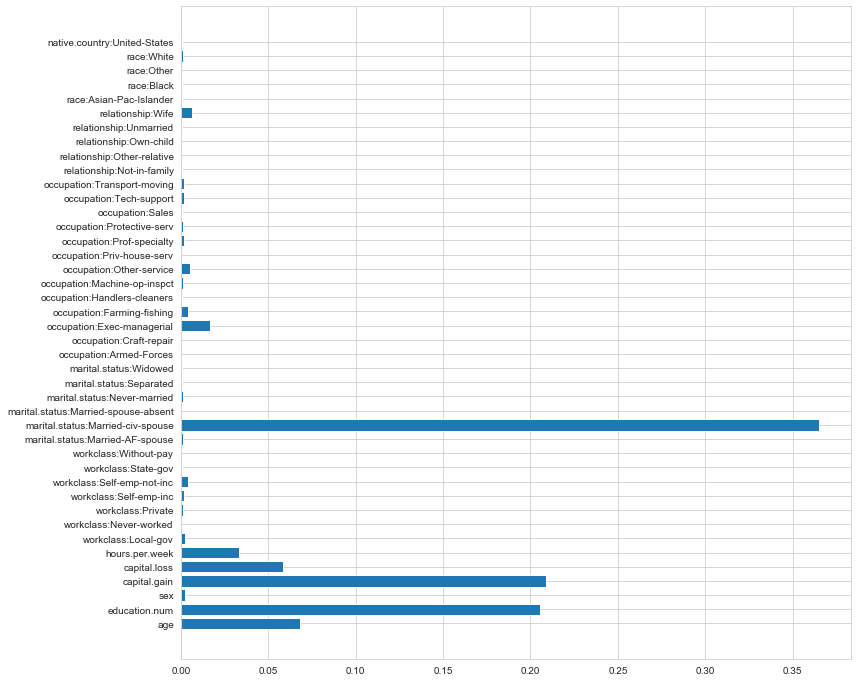

In [83]:
importance_income = clf_GB.fit(X_train_scaled_income, y_train_income).feature_importances_

plt.figure(figsize=(12, 12))

plt.barh([x for x in X_train_income.columns], importance_income)
plt.show()

In [84]:
feature_imp_income = pd.Series(importance_income, index = column_names_income).sort_values(ascending=False)
top_feat_income = feature_imp_income.nlargest(n=10)
top_feat_income

marital.status:Married-civ-spouse    0.364939
capital.gain                         0.208919
education.num                        0.205546
age                                  0.067973
capital.loss                         0.058642
hours.per.week                       0.032972
occupation:Exec-managerial           0.016895
relationship:Wife                    0.006081
occupation:Other-service             0.005134
workclass:Self-emp-not-inc           0.004253
dtype: float64

Calculating the feature importance of attributes, our analysis found that these were the top attributes contributing to the model. Earlier in our analysis, we noticed the discrepency of married couple's having a better financial advantage over unmarried, so we're glad to see that attribute on top as it validates that hypothesis.

Other than that we can see that `capital.gain`, `education.num`, `age` are also very important attributes for the `income` because `education` is a very huge factor for the income so as the investment done by the adult. 

#### Feature Importance for `sex` data

In [85]:
column_names_sex = []
for col_name in sex_data.columns: 
    column_names_sex.append(col_name)
    
column_names_sex    

['age',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'income',
 'workclass:Local-gov',
 'workclass:Never-worked',
 'workclass:Private',
 'workclass:Self-emp-inc',
 'workclass:Self-emp-not-inc',
 'workclass:State-gov',
 'workclass:Without-pay',
 'marital.status:Married-AF-spouse',
 'marital.status:Married-civ-spouse',
 'marital.status:Married-spouse-absent',
 'marital.status:Never-married',
 'marital.status:Separated',
 'marital.status:Widowed',
 'occupation:Armed-Forces',
 'occupation:Craft-repair',
 'occupation:Exec-managerial',
 'occupation:Farming-fishing',
 'occupation:Handlers-cleaners',
 'occupation:Machine-op-inspct',
 'occupation:Other-service',
 'occupation:Priv-house-serv',
 'occupation:Prof-specialty',
 'occupation:Protective-serv',
 'occupation:Sales',
 'occupation:Tech-support',
 'occupation:Transport-moving',
 'relationship:Not-in-family',
 'relationship:Other-relative',
 'relationship:Own-child',
 'relationship:Unmarried',
 'relationship:Wife',

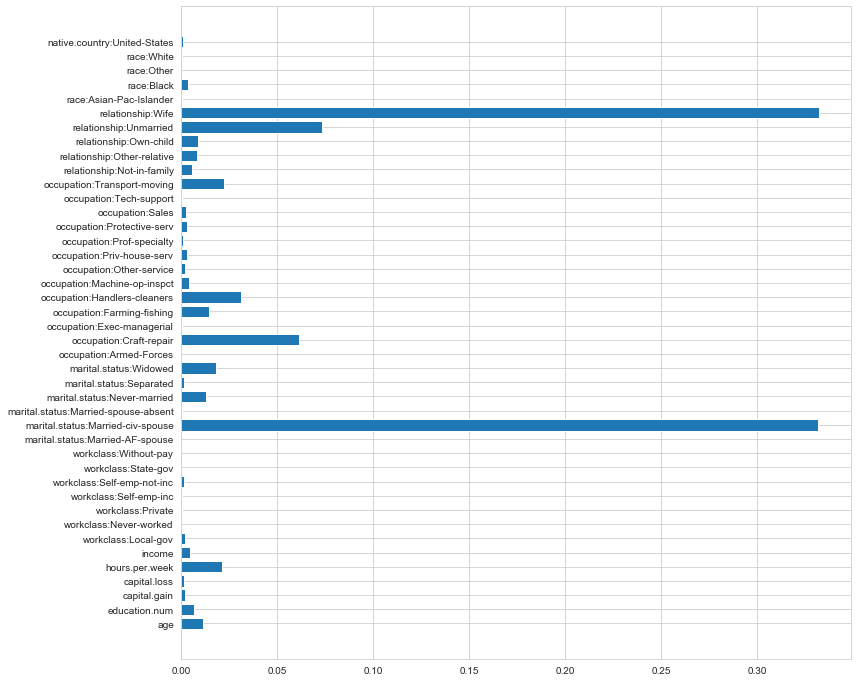

In [86]:
importance_sex = clf_GB.fit(X_train_scaled_gender, y_train_gender).feature_importances_

plt.figure(figsize=(12, 12))

plt.barh([x for x in X_train_gender.columns], importance_sex)
plt.show()

In [87]:
feature_imp_sex = pd.Series(importance_sex, index = column_names_sex).sort_values(ascending=False)
top_feat_sex = feature_imp_sex.nlargest(n=10)
top_feat_sex

relationship:Wife                    0.331972
marital.status:Married-civ-spouse    0.331554
relationship:Unmarried               0.073483
occupation:Craft-repair              0.061396
occupation:Handlers-cleaners         0.031397
occupation:Transport-moving          0.022492
hours.per.week                       0.021623
marital.status:Widowed               0.018465
occupation:Farming-fishing           0.014461
marital.status:Never-married         0.012892
dtype: float64

Calculating the feature importance of attributes, our analysis found
that these were the top attributes contributing to the model.  We noticed with the income data that 'marital.status:Married-civ-spouse' was the most important feature in the model.  With the sex data, even though this feature is still really imporant, 'relationship:Wife' seems to be just slightly more important.  That is probably because if the individual is labeled as part of a married couple and whether or not the relationship is that of a wife, it will give a clear picture on whether the individual is male or female.

### Deployment

For income classification task, we forsee a large number of opportunities for application. Regardless of whether it be for banks/Visa organizations to improve their own models for how safe they feel loaning a specific gathering of individuals cash dependent on their monetary conditions. It could likewise be applied for public review's that individuals need to lead. Our model could help trim down what factors they need to remember for their refreshed model. ie - which are the biggest factors and focus on those for examination. Another application could be for neighborhood governments, to help plan new projects that could advance and benefit the particular set of individuals. <br>

For sex classification task, one area where this model may demonstrate its' value is in gathering client data from sites. This model can be used to help researchers find the probability of the gender of a certain individual depending on certain picked out circumstances.  Researchers can find out what specific instances apply to more to men and women and it can help them better understand gender inequality or preferences through these set of features.  This could help bring a more in depth view into gender studies as a whole. <br>

Estimating the models worth would be done through a steady observation of the Accuracy and F1-score as we've done in this instance. Enabling the end client to monitor how well the model is predicting, as we add more information to it. Arrangement of the model, could be through a rest API administration, an inner capacity worked in the backend of whatever database framework they have set up. As far as other information that could be helpful to Census Data, we would propose finding an asset that can give, lodging possession, nearby financial key execution factors, postal districts to decide ability pools for who lives in what territory. The prospects are enormous relying upon what components impact the clients business most. As every business you would sell this model also would almost certainly have their own thought's behind what elements make them sucssesful

### Exceptional Work

In Exceptional Work we are going to perform GridSearchCV on `SVM`, `KNN`, and `Random Forest`  for predicting `income` and `Random Forest`, `KNN`, and `Logistic Regression` for predicting the `gender`.

After performing the GridSearchCV and knowing the `best parameters` we will implement each algorithm on those best parameters given by GridSearch and will store the accuracy of each model and will then make a DataFrame to get a clear look and easily compare different models.

#### - GridSearchCV for predicting the income

In [56]:
from sklearn.model_selection import GridSearchCV

In [59]:
# GridSearchCV for Random Forest
# 1 * 3 * 2 * 3 * 3 * 4 = 216 combinations 

param_grid_rf_1 = {
    'bootstrap': [True],
    'max_depth': [20, 40, 60],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [150, 300, 550, 1000]
}

rf_1 = RandomForestClassifier()

grid_search_rf_1 = GridSearchCV(estimator = rf_1, param_grid = param_grid_rf_1, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search_rf_1.fit(X_train_scaled_income, y_train_income)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 34.4min
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed: 34.9min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [60]:
grid_search_rf_1.best_params_

{'bootstrap': True,
 'max_depth': 60,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 1000}

In [269]:
best_score_rf_1 = grid_search_rf_1.best_score_

best_score_rf_1

0.8657444005270092

In [61]:
rf_1 = RandomForestClassifier(max_features = 3, n_estimators= 150, max_depth=40, 
                              bootstrap = 'True', min_samples_leaf = 3, min_samples_split = 12)

In [62]:
rf_1.fit(X_train_scaled_income, y_train_income)

RandomForestClassifier(bootstrap='True', class_weight=None, criterion='gini',
                       max_depth=40, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
pred_rf_1 = rf_1.predict(X_test_scaled_income)

In [64]:
rf_1_gridsearch_accuracy = accuracy_score(y_test_income, pred_rf_1)

In [282]:
print("Accuracy for Random Forest is : ", rf_1_gridsearch_accuracy)

Accuracy for Random Forest is :  0.8612330932724398


In [66]:
# GrideSearchCV for SVM
# --->    3 * 4 * 2 * 3 = 72 combinations


param_grid_svm_1 = {
    'C': [0.8, 1, 1.2],
    'degree': [3, 4, 5, 6],
    'shrinking': [True, False],
    'tol': [0.001, 0.0001, 0.00001]
                }

svc_1 = SVC()

grid_search_svm_1 = GridSearchCV(estimator = svc_1, param_grid = param_grid_svm_1, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search_svm_1.fit(X_train_scaled_income, y_train_income)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 25.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.8, 1, 1.2], 'degree': [3, 4, 5, 6],
                         'shrinking': [True, False],
                         'tol': [0.001, 0.0001, 1e-05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [67]:
grid_search_svm_1.best_params_

{'C': 1.2, 'degree': 3, 'shrinking': True, 'tol': 0.001}

In [270]:
best_score_svm_1 = grid_search_svm_1.best_score_

best_score_svm_1

0.854062362758015

In [68]:
svc_1 = SVC(C = 1, degree = 3, shrinking = True, tol = 0.0001)

In [69]:
svc_1.fit(X_train_scaled_income, y_train_income)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.0001, verbose=False)

In [70]:
pred_svc_1 = svc_1.predict(X_test_scaled_income)

In [71]:
svm_1_gridsearch_accuracy = accuracy_score(y_test_income, pred_svc_1)

In [281]:
print("Accuracy for SVM is :", svm_1_gridsearch_accuracy)

Accuracy for SVM is : 0.8535043035306517


In [58]:
# GrideSearchCV for KNN
# --->    4 * 3 * 2 * 3 = 72 combinations

param_grid_knn_1 = {
    'n_neighbors': [5, 10, 15, 20],
    'leaf_size': [30, 40, 50],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree']
                    }

knn_1 = KNeighborsClassifier()

grid_search_knn_1 = GridSearchCV(estimator = knn_1, param_grid = param_grid_knn_1, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search_knn_1.fit(X_train_scaled_income, y_train_income)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 17.2min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'leaf_size': [30, 40, 50],
                         'n_neighbors': [5, 10, 15, 20],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [73]:
grid_search_knn_1.best_params_

{'algorithm': 'auto',
 'leaf_size': 30,
 'n_neighbors': 15,
 'weights': 'distance'}

In [271]:
best_score_knn_1 = grid_search_knn_1.best_score_

best_score_knn_1

0.8372859025032938

In [76]:
knn_1 = KNeighborsClassifier(n_neighbors = 15, weights = 'distance', algorithm = 'auto', leaf_size = 30)

In [77]:
knn_1.fit(X_train_scaled_income, y_train_income)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='distance')

In [78]:
pred_knn_1 = knn_1.predict(X_test_scaled_income)

In [79]:
knn_1_gridsearch_accuracy = accuracy_score(y_test_income, pred_knn_1)

In [280]:
print("Accuracy for KNN is: ", knn_1_gridsearch_accuracy)

Accuracy for KNN is:  0.8410328473564026


#### In the cell below we have created a DataFrame which will be showing the best score of each model for the `Income`. 

In [272]:
gridsearch_accuracies_1 = [best_score_rf_1, best_score_svm_1, best_score_knn_1]

pd.DataFrame(list(zip(gridsearch_accuracies_1)) ,columns = ['Accuracy Scores on Grid Search CV'],
             index = ['Random Forest Classifier', 'Support Vector Classifier', 'K Nearest Neighbor']).sort_values(by = 'Accuracy Scores on Grid Search CV',
                                                                                            ascending = False)

,Accuracy Scores on Grid Search CV
Random Forest Classifier,0.865744
Support Vector Classifier,0.854062
K Nearest Neighbor,0.837286


####  We can see that the accuracy for the Random Forest has increased after tuning the parameters. Random Forest seems the best model of them all based on the accuracy (score).

#### Performing GridSearchCV for predicting the `gender`.

In [82]:
# GridSearchCV for Random Forest
# --->    1 * 3 * 2 * 3 * 3 * 4 = 216 combinations

param_grid_rf_2 = {
    'bootstrap': [True],
    'max_depth': [20, 40, 60],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [150, 300, 550, 1000]
}

rf_2 = RandomForestClassifier()

grid_search_rf_2 = GridSearchCV(estimator = rf_2, param_grid = param_grid_rf_2, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [83]:
grid_search_rf_2.fit(X_train_scaled_gender, y_train_gender);

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed: 31.1min finished


In [84]:
grid_search_rf_2.best_params_

{'bootstrap': True,
 'max_depth': 60,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 550}

In [273]:
best_score_rf_2 = grid_search_rf_2.best_score_

best_score_rf_2

0.8416337285902503

In [85]:
rf_2 = RandomForestClassifier(max_features = 3, n_estimators= 150, max_depth=40, bootstrap = 'True',
                              min_samples_leaf = 3, min_samples_split = 4)

In [90]:
rf_2.fit(X_train_scaled_gender, y_train_gender)

RandomForestClassifier(bootstrap='True', class_weight=None, criterion='gini',
                       max_depth=40, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [91]:
pred_rf_2 = rf_2.predict(X_test_scaled_gender)

In [92]:
rf_2_gridsearch_accuracy = accuracy_score(y_test_gender, pred_rf_2)

In [279]:
print("Accuracy for Random Forest is: ", rf_2_gridsearch_accuracy)

Accuracy for Random Forest is:  0.8422624275425962


In [253]:
# GridSearchCV for Logistic Regression
# --->    3 * 4 * 2 * 3 = 72 combinations

param_grid_logreg = {
    'C': [0.8, 1, 1.2],
    'solver': ['sag', 'saga', 'newton-cg', 'lbfgs'],
    'fit_intercept': [True, False],
    'tol': [0.001, 0.0001, 0.00001]
                }

log_reg = LogisticRegression()

grid_search_logreg = GridSearchCV(estimator = log_reg, param_grid = param_grid_logreg, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search_logreg.fit(X_train_scaled_gender, y_train_gender)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  5.9min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.8, 1, 1.2], 'fit_intercept': [True, False],
                         'solver': ['sag', 'saga', 'newton-cg', 'lbfgs'],
                         'tol': [0.001, 0.0001, 1e-05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [254]:
grid_search_logreg.best_params_

{'C': 1.2, 'fit_intercept': True, 'solver': 'newton-cg', 'tol': 0.001}

In [274]:
best_score_logreg = grid_search_logreg.best_score_

best_score_logreg

0.8384277558190601

In [256]:
log_reg = LogisticRegression(C = 1.2, fit_intercept = True, solver = 'newton-cg', tol = 0.001)

In [257]:
log_reg.fit(X_train_scaled_gender, y_train_gender)

LogisticRegression(C=1.2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.001, verbose=0,
                   warm_start=False)

In [258]:
pred_logreg = log_reg.predict(X_test_scaled_gender)

In [259]:
logreg_gridsearch_accuracy = accuracy_score(y_test_gender, pred_logreg)

In [278]:
print("Accuracy for Logistic Regression is: ", logreg_gridsearch_accuracy)

Accuracy for Logistic Regression is:  0.8396276128578957


In [97]:
# GridSearchCV for KNN
# --->    4 * 3 * 2 * 3 = 72 combinations

param_grid_knn_2 = {
    'n_neighbors': [5, 10, 15, 20],
    'leaf_size': [30, 40, 50],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree']
                }

knn_2 = KNeighborsClassifier()

grid_search_knn_2 = GridSearchCV(estimator = knn_2, param_grid = param_grid_knn_2, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search_knn_2.fit(X_train_scaled_income, y_train_income)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 16.9min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'leaf_size': [30, 40, 50],
                         'n_neighbors': [5, 10, 15, 20],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [98]:
grid_search_knn_2.best_params_

{'algorithm': 'auto',
 'leaf_size': 30,
 'n_neighbors': 15,
 'weights': 'distance'}

In [275]:
best_score_knn_2 = grid_search_knn_2.best_score_

best_score_knn_2

0.8372859025032938

In [105]:
knn_2 = KNeighborsClassifier(n_neighbors = 15, weights = 'distance', algorithm = 'auto', leaf_size = 30)

In [106]:
knn_2.fit(X_train_scaled_income, y_train_income)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='distance')

In [107]:
pred_knn_2 = knn_2.predict(X_test_scaled_income)

In [108]:
knn_2_gridsearch_accuracy = accuracy_score(y_test_income, pred_knn_2)

In [277]:
print("Accuracy for KNN: ", knn_2_gridsearch_accuracy)

Accuracy for KNN:  0.8410328473564026


In the cell below we have created a DataFrame which will be showing the best score of each model for the `Sex`. 

In [276]:
gridsearch_accuracies_2 = [best_score_rf_2, best_score_logreg, best_score_knn_2]

pd.DataFrame(list(zip(gridsearch_accuracies_2)) ,columns = ['Accuracy Scores on Grid Search CV'],
             index = ['Random Forest Classifier', 'Logistic Regression', 'K Nearest Neighbor']).sort_values(by = 'Accuracy Scores on Grid Search CV',
                                                                                            ascending = False)

,Accuracy Scores on Grid Search CV
Random Forest Classifier,0.841634
Logistic Regression,0.838428
K Nearest Neighbor,0.837286


#### In conclusion, the accuracy of all the models has increased and we can see that Random Forest is performing very well on this dataset (for predicting the `gender`).

## Citations/Sources

1. When to use Random Forest over SVM and vice versa? https://datascience.stackexchange.com/questions/6838/when-to-use-random-forest-over-svm-and-vice-versa

2. Stephanie Glen. Decision Tree vs Random Forest vs Gradient Boosting Machines: Explained Simply https://www.datasciencecentral.com/profiles/blogs/decision-tree-vs-random-forest-vs-boosted-trees-explained